# Matplotlib

[Matplotlib](https://matplotlib.org/) is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK. [Wikipedia](https://en.wikipedia.org/wiki/Matplotlib)

## Install

To install Matplotlib, same with [Numpy](./numpy.md) tutorial, you can rename it with matplotlib to install.

```bash
py -3.8 -m pip install matplotlib
```
```{figure} ../images/ML/matplotlibinstall.png
---
height: 300px
name: matplotlibinstall-fig
---

```

## Start with Mathplotlib

- Plot Sin Cos From [c.poupin  ](https://forum.dynamobim.com/u/c.poupin/summary)

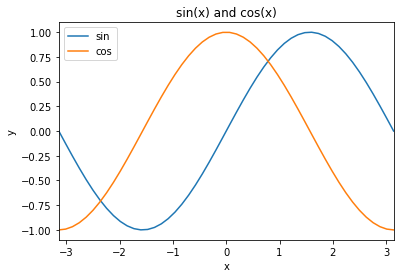

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
import math
# plot sin and cos wave
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(-np.pi, np.pi)

ax.set_xlim(-np.pi, np.pi)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.plot(x, np.sin(x), label="sin")
ax.plot(x, np.cos(x ), label="cos")
ax.legend()
ax.set_title("sin(x) and cos(x)")
plt.show()

`Download:`

```{button-link} https://github.com/chuongmep/Awesome-Dynamo/blob/master/files/MatplotDemo.dyn
:color: primary
:shadow:
```

Because some error when we use **plt.show()** in Dynamo, so we need convert to bitmap before.

``` py
def plt2arr(fig):
    """
    need to draw if figure is not drawn yet
    """
    fig.canvas.draw()
    rgba_buf = fig.canvas.buffer_rgba()
    (w,h) = fig.canvas.get_width_height()
    rgba_arr = np.frombuffer(rgba_buf, dtype=np.uint8).reshape((h,w,4))
    return rgba_arr

def convertToBitmap2(npImgArray):
    bitmap_ = None
    # remove alpha
    if npImgArray.ndim == 3 and npImgArray.shape[-1] == 4:
        npImgArray = npImgArray[:, :, :-1]
    # convert to PIL Image
    if npImgArray.ndim == 3:
        image = Image.fromarray(npImgArray, "RGB")
    else:
        image = Image.fromarray(npImgArray, "L")
    # convert to Python ByteArray
    byteIO = io.BytesIO()
    image.save(byteIO, format='BMP')
    byteArr = byteIO.getvalue()
    # convert to Net ByteArray
    netBytes = System.Array[System.Byte](byteArr)
    with MemoryStream(netBytes) as ms:
        bitmap_ = Bitmap(ms)
    return bitmap_

```
Now, we're going to combine the two and bring them back to work with Dynamo

```{figure} ../images/ML/matplotshowdemo.gif
---
height: 520px
name: matplotshowdemo-fig
---

```
```{note}
Please follow this post to update new information [Python 3 Skelitonization - plt.show() not work](https://forum.dynamobim.com/t/python-3-skelitonization-plt-show-not-work/63216/8?u=c.poupin)
```

Plot 2D data on 3D plot

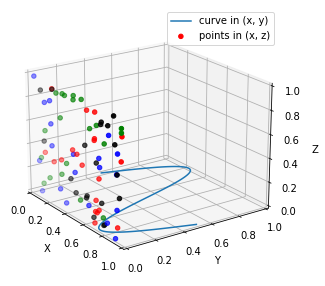

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
import math
#Plot 2D data on 3D plot
fig = plt.figure(figsize =(8,5))
ax = fig.add_subplot(projection='3d')

# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, zs=0, zdir='z', label='curve in (x, y)')

# Plot scatterplot data (20 2D points per colour) on the x and z axes.
colors = ('r', 'g', 'b', 'k')

# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.random.sample(20 * len(colors))
y = np.random.sample(20 * len(colors))
c_list = []
for c in colors:
    c_list.extend([c] * 20)
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x, y) points are plotted on the x and z axes.
ax.scatter(x, y, zs=0, zdir='y', c=c_list, label='points in (x, z)')

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35)
plt.show()

`Result:`
```{toggle}
![](../images/ML/matplot2.png)
```

`Download:`

```{button-link} https://github.com/chuongmep/Awesome-Dynamo/blob/master/files/Matplot2Demo.dyn
:color: primary
:shadow:
```